Recall the Falkner-Skan equation
\begin{equation}
    m(f')^2 − \frac{1}{2}(m + 1)ff'' = m + f''',
\end{equation}
which we shall numerically solve suject to the one-point boundary conditions
\begin{equation}
    f(0) = f'(0) = 0, \quad f''(0) = S,
\end{equation}
where $S$ is a known constant.

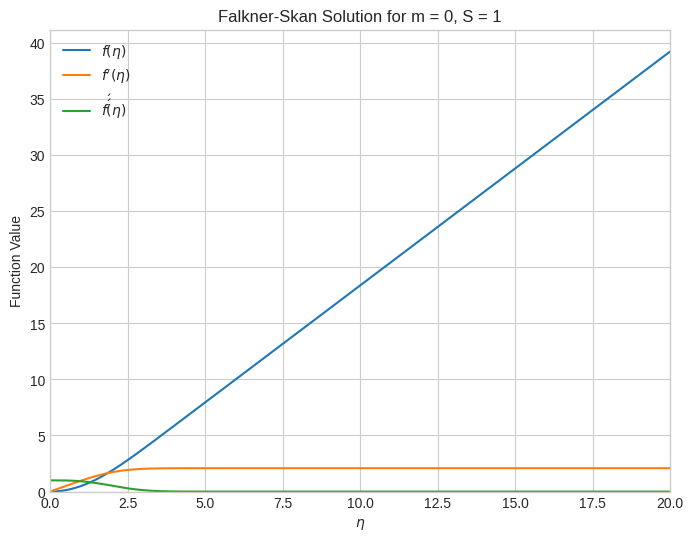


The constant A_inf is approximately: 2.0854092


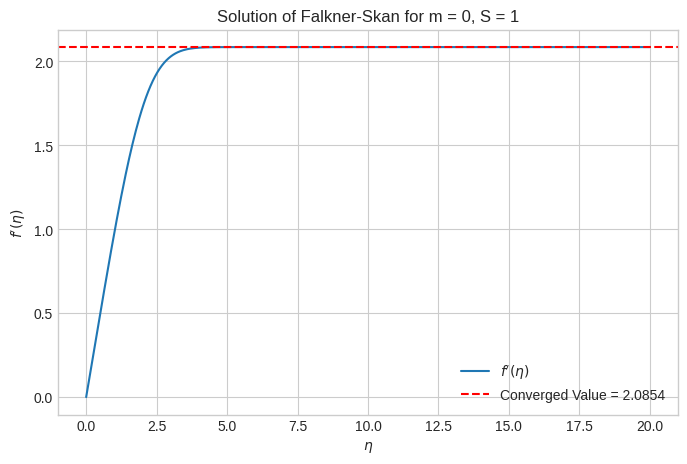

In [189]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_falkner_skan(m, S, eta_max):
    '''
    Integrates the Falkner-Skan equation for given parameters m and S.
    Convert into a system of first-order ODEs, y = [f, f', f'']
    y' = [y[1], y[2], -0.5*(m+1)*y[0]*y[2] - m*(1 - y[1]**2)]
    Args:
        m: The Falkner-Skan pressure gradient parameter.
        S: The initial condition for the second derivative.
        eta_max: The maximum value of eta for the integration domain.
    Returns:
        The solution object.
    '''
    # Define the system of first-order ODEs
    def ode_system(eta, y):
        # y[0] = f, y[1] = f', y[2] = f''
        f_triple_prime = -0.5 * (m + 1) * y[0] * y[2] - m * (1 - y[1]**2)
        return [y[1], y[2], f_triple_prime]

    # Set the initial conditions based on equation (17)
    # f(0) = 0, f'(0) = 0, f''(0) = S
    initial_conditions = [0, 0, S]

    # Define the integration span for eta
    eta_span = [0, eta_max]

    # Use solve_ivp to integrate the ODE system
    solution = solve_ivp(
        fun=ode_system,
        t_span=eta_span,
        y0=initial_conditions,
        dense_output=True,
        method='LSODA',
        rtol=1e-9,
        atol=1e-9
    )

    return solution

def plot_solution(solution, m, S):
    '''
    Plots the Falkner-Skan solution f(eta), f'(eta), and f''(eta).
    Args:
        solution: The solution object from solve_falkner_skan.
        m: The parameter m used in the solution.
        S: The parameter S used in the solution.
    '''
    # Generate points for a smooth plot
    eta = np.linspace(solution.sol.t_min, solution.sol.t_max, 500)

    # Evaluate the solution at the generated points
    y = solution.sol(eta)

    f = y[0]
    f_prime = y[1]
    f_double_prime = y[2]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(eta, f, label=r'$f(\eta)$')
    ax.plot(eta, f_prime, label=r"$f'(\eta)$")
    ax.plot(eta, f_double_prime, label=r'$f\'\'(\eta)$')

    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel('Function Value')
    ax.set_title(f'Falkner-Skan Solution for m = {m}, S = {S}')
    ax.legend()
    ax.set_xlim(solution.sol.t_min, solution.sol.t_max)
    ax.set_ylim(bottom=0)
    ax.grid(True)
    plt.show()

m_val = 0
S_val = 1
eta_limit = 20
solution = solve_falkner_skan(m=m_val, S=S_val, eta_max=eta_limit)
plot_solution(solution, m=m_val, S=S_val)

# Determine the constant f'(eta -> inf)
# Evaluate the solution at several large values of eta
eta_points = np.array([10, 12, 14, 16, 18, 20])
f_prime_values = solution.sol(eta_points)[1]
A_inf = f_prime_values[-1]
print(f"\nThe constant A_inf is approximately: {A_inf:.7f}")

eta_plot = np.linspace(0, eta_limit, 500)
y_plot = solution.sol(eta_plot)

plt.figure(figsize=(8, 5))
plt.plot(eta_plot, y_plot[1], label=r"$f'(\eta)$")
plt.axhline(y=A_inf, color='r', linestyle='--', label=f'Converged Value = {A_inf:.4f}')
plt.xlabel(r'$\eta$')
plt.ylabel(r"$f'(\eta)$")
plt.title(f"Solution of Falkner-Skan for m = {m_val}, S = {S_val}")
plt.legend()
plt.show()

For $m = 0$, the governing equation is
\begin{equation}
    f''' + \frac{1}{2}ff'' = 0.  
\end{equation}
As $\eta \to \infty$, $f'(\eta) \to A$ and $f''(\eta) \to 0$, the function $f(\eta)$ will behave asymptotically as $A\eta + C$ for some constant $C$. Substituting this into the equation shows that the convergence of $f'$ to $A$ is exponential.


We now find the value of $f''(0)$ for the boundary-value problem for $m = 0$, subject to our boundary conditions and $f'(\eta) \to 1$ as $\eta \to \infty$. Consider a scaled solution $g(\eta) = af(b\eta)$, where $f$ is our computed solution. We need to find constants $a$ and $b$ such that $g(\eta)$ satisfies the boundary-value problem conditions. Compute the derivatives
\begin{align}
    g' &= abf'(b\eta), \\
    g'' &= ab^2f''(b\eta), \\
    g''' &= ab^3f'''(b\eta).
\end{align}
Substituting into the equation yields
\begin{equation}
    g''' + \frac{1}{2}gg'' = 0 \implies \frac{1}{2}b^2(2bf'''(b\eta) + af(b\eta)f''(b\eta)) = 0
\end{equation}
Since $f$ is a solution, i.e., $f'''(\xi) = -\frac{1}{2}f(\xi)f''(\xi)$, where $\xi = b\eta$, we have
\begin{equation}
    \frac{1}{2}ab^2(-bf(b\eta)f''(b\eta) + af(b\eta)f''(b\eta)) = \frac{1}{2}ab^2(a - b)f(b\eta)f''(b\eta) = 0.
\end{equation}
For this to be true, we must have $a = b$. Now we apply the boundary conditions
\begin{align}
    g(0) &= af(0) = 0, \\
    g'(0) &= a^2f'(0) = 0, \\
    g(\eta \to \infty) &= a^2f'(a\eta \to \infty) = a^2A.
\end{align}
The boundary-value problem requires $g'(\infty) = 1$, thus $a^2A = 1$ or $a = 1/\sqrt{A}$. The second derivative is given by
\begin{equation}
    g''(0) = a^3f''(0) = a^3 = A^{-3/2}.
\end{equation}

The goal is to find a specific value of $S_m = f''(0)$ such that the boundary condition $f'(\eta) \to 1$ as $\eta \to \infty$ is satisfied. The shooting method involves guessing a value for $S_m$, solving the initial value problem, and checking the behavior of $f'(\eta)$ at a large $\eta$ and adjusting the guess as required.

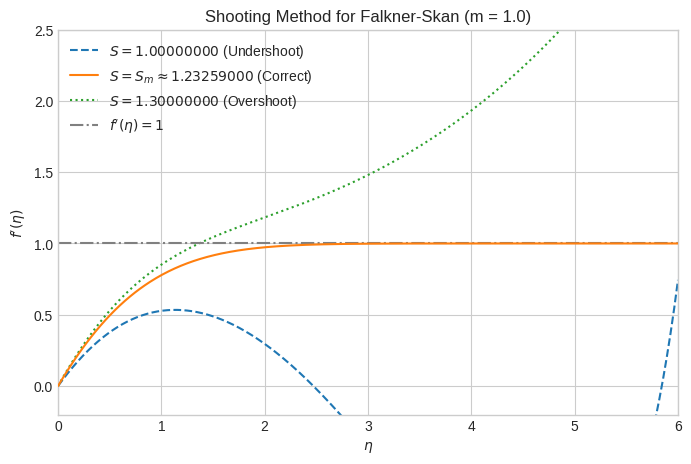

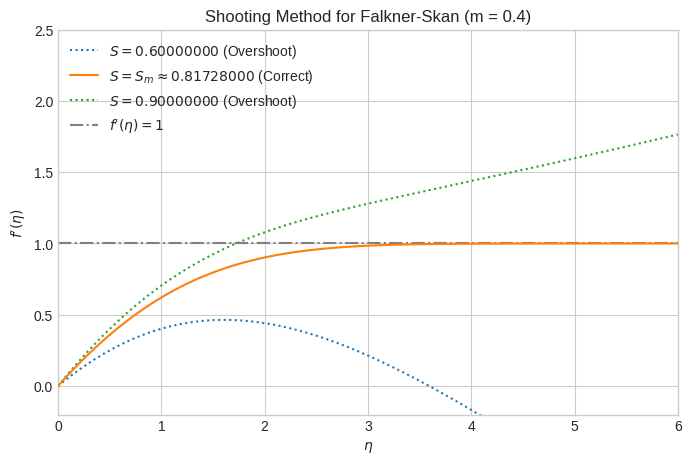

In [190]:
def plot_shooting_method(m, S_values, Sm, eta_max=10):
    '''
    Plots f'(eta) for different S values to demonstrate the shooting method.

    Args:
        m: The Falkner-Skan parameter.
        S_values: A list of S values to try (guesses).
        Sm: The "correct" value of S for labeling.
        eta_max: The maximum eta for integration.
    '''
    plt.figure(figsize=(8, 5))

    for S in S_values:
        # Solve the ODE for the current guess of S
        sol = solve_falkner_skan(m, S, eta_max)

        # Generate points for plotting
        eta_plot = np.linspace(0, sol.sol.t_max, 500)
        f_prime = sol.sol(eta_plot)[1]
        if abs(f_prime[-1] - 1) < 1e-4:
            label = f'$S = S_m \\approx {S:.8f}$ (Correct)'
            plt.plot(eta_plot, f_prime, label=label, zorder=10)
        elif abs(f_prime[-1]) < 1:
            label = f'$S = {S:.8f}$ (Undershoot)'
            plt.plot(eta_plot, f_prime, label=label, linestyle='--')
        else:
            label = f'$S = {S:.8f}$ (Overshoot)'
            plt.plot(eta_plot, f_prime, label=label, linestyle=':')

    # Formatting the plot
    plt.axhline(y=1, color='gray', linestyle='-.', label="$f'(\\eta)=1$")
    plt.xlabel(f'$\\eta$')
    plt.ylabel(f"$f'(\\eta)$")
    plt.title(f'Shooting Method for Falkner-Skan (m = {m})')
    plt.legend()
    plt.xlim(0, eta_max)
    plt.ylim(-0.2, 2.5)
    plt.grid(True)
    plt.show()

m2 = 1.0
Sm2 = 1.23259
S_guesses2 = [1.0, Sm2, 1.3]
plot_shooting_method(m=m2, S_values=S_guesses2, Sm=Sm2, eta_max=6)

m1 = 0.4
Sm1 = 0.81728
S_guesses1 = [0.6, Sm1, 0.9]
plot_shooting_method(m=m1, S_values=S_guesses1, Sm=Sm1, eta_max=6)

  m = 0.00  -->  Sm = 0.332566
  m = 0.10  -->  Sm = 0.496652
  m = 0.20  -->  Sm = 0.621331
  m = 0.30  -->  Sm = 0.725742
  m = 0.40  -->  Sm = 0.817293
  m = 0.50  -->  Sm = 0.902248
  m = 0.60  -->  Sm = 0.976820
  m = 0.70  -->  Sm = 1.046449
  m = 0.80  -->  Sm = 1.111936
  m = 0.90  -->  Sm = 1.173896
  m = 1.00  -->  Sm = 1.232819


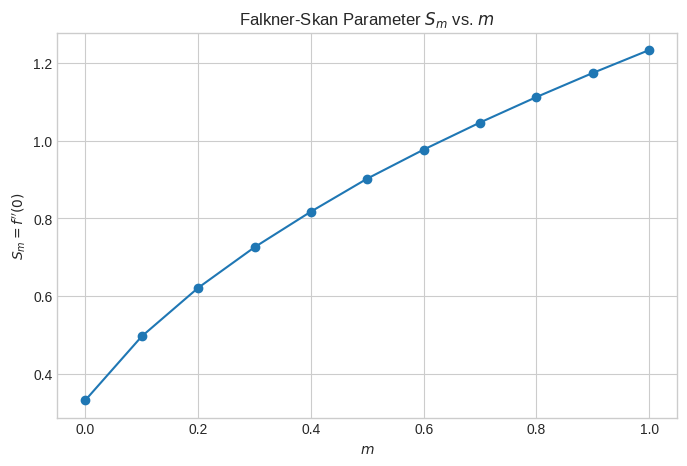

In [195]:
from scipy.optimize import brentq

def find_sm(m, s_min=0.3, s_max=1.3):
    '''
    Finds the value Sm for a given m using a root-finding algorithm.
    '''
    # Define the objective function for the root-finder
    if m < 0.5:
        eta_max = 6
    else:
        eta_max = 3
    def objective(S):
        # Solve the IVP with the current guess for S
        sol = solve_falkner_skan(m, S, eta_max)
        # Get the value of f' at the end of the integration interval
        f_prime_at_eta_max = sol.y[1, -1]
        # Return the residual, which should be zero for the correct S
        return f_prime_at_eta_max - 1.0
    try:
        # Use brentq to find the root S between s_min and s_max
        sm_value = brentq(objective, s_min, s_max, xtol=1e-4, rtol=1e-4, maxiter=100)
        return sm_value
    except ValueError:
        print(f"Root not found in the bracket [{s_min}, {s_max}] for m = {m}.")
        return 0

# Generate a range of m values
m_values = np.linspace(0, 1, 11)
sm_results = []

for m in m_values:
    sm = find_sm(m)
    sm_results.append(sm)
    print(f"  m = {m:.2f}  -->  Sm = {sm:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(m_values, sm_results, 'o-', label='$S_m$ vs. $m$')
plt.xlabel('$m$')
plt.ylabel('$S_m = f\'\'(0)$')
plt.title('Falkner-Skan Parameter $S_m$ vs. $m$')
plt.grid(True)
plt.show()

The parameter $m$ is directly related to the pressure gradient imposed on the boundary layer by the external flow. Specifically, the pressure gradient $\frac{dp}{dx}$ is proportional to $-m$. A positive $m$ corresponds to a favorable pressure gradient, where the pressure decreases in the direction of the flow. This accelerates the external flow.
*   Taking $m = 0$ represents a zero pressure gradient or the case of flow over a flat plate (Blasius solution).
*   Taking $m = 1$ represents a strong favorable pressure gradient, corresponding to flow impinging on a plane (stagnation-point flow).

The value $S_m = f''(0)$ is the dimensionless velocity gradient at the wall. Since the tangential stress at the wall is given by $\tau_0 = \mu\frac{\partial u}{\partial y}|_{y=0}$, it is directly proportional to the wall shear stress.

As the favorable pressure gradient becomes stronger, the wall shear stress also increases. This is because it helps to accelerate the fluid within the boundary layer, pulling it along with the external flow. This leads to a steeper velocity profile near the wall, meaning the fluid velocity increases more rapidly from zero. A steeper gradient directly translates to higher friction or drag on the surface. Conversely, an adverse pressure gradient $m < 0$ would decelerate the fluid, leading to a less steep profile and lower wall shear stress, eventually causing flow separation.